In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.metrics import accuracy_score,confusion_matrix

C:\Users\DELL\Anaconda3\lib\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.1.0' currently installed).
  warnings.warn(msg, UserWarning)

Bad key "text.kerning_factor" on line 4 in
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [65]:
dataset=pd.read_csv('./train.csv')

In [6]:
dataset.Target.value_counts()

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

In [7]:
dataset

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0000,100.0000,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0000,144.0000,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0000,121.0000,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0000,121.0000,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0000,121.0000,1369,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,ID_d45ae367d,80000.0,0,6,0,1,1,0,NaN,0,...,81,2116,25,81,1,1.562500,0.0625,68.0625,2116,2
9553,ID_c94744e07,80000.0,0,6,0,1,1,0,NaN,0,...,0,4,25,81,1,1.562500,0.0625,68.0625,4,2
9554,ID_85fc658f8,80000.0,0,6,0,1,1,0,NaN,0,...,25,2500,25,81,1,1.562500,0.0625,68.0625,2500,2
9555,ID_ced540c61,80000.0,0,6,0,1,1,0,NaN,0,...,121,676,25,81,1,1.562500,0.0625,68.0625,676,2


In [8]:
dataset.shape

(9557, 143)

In [9]:
#finding the Features with missing values 

In [10]:
null_columns=dataset.loc[:,dataset.isnull().sum()>0].columns

In [11]:
dataset[null_columns].isnull().sum()

v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

In [12]:
NonOwnHouseOwners=dataset[dataset.tipovivi1!=1]

In [13]:
NonOwnHouseOwners=NonOwnHouseOwners[dataset.tipovivi2!=1]

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [14]:
NonOwnHouseOwners.shape

(2685, 143)

In [15]:
NonOwnHouseOwnersNull=NonOwnHouseOwners.isnull().sum()

In [16]:
NonOwnHouseOwnersNull=NonOwnHouseOwnersNull[NonOwnHouseOwnersNull>0]

In [17]:
NonOwnHouseOwnersNull

v2a1          949
v18q1        2140
rez_esc      2148
meaneduc        4
SQBmeaned       4
dtype: int64

In [18]:
dataset.Target.value_counts()

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

In [19]:
#Target feature  is the the target variable in the dataset

In [20]:
import seaborn as sns

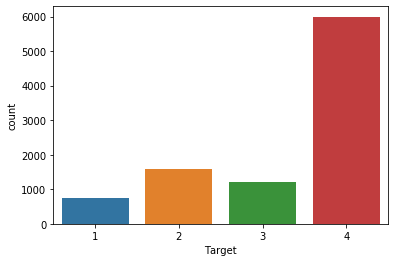

In [21]:
sns.countplot(dataset.Target)

In [22]:
#catogery 4 is the majority in the dataset 
#which indicates that there is bias in the datase

In [23]:
#for given household the proverty levels cant be different and they have to be fixed

In [24]:
#total unique households 
TotalHouseholds=np.unique(dataset.idhogar)

In [25]:
len(TotalHouseholds)

2988

In [26]:
def findAllmisMatchedHouseholdPovLevels():
    mismatchHouseList = []
    mismatchIDList =[]
    
    #Iterate through full data
    for houseid in np.unique(dataset.idhogar):
        householdData = dataset[dataset.idhogar==houseid]
        latched = False
        targetValLatch= 1
        for id in householdData.Id:
            if (not latched):
                targetValLatch = householdData[householdData.Id==id].Target.values.ravel()
                latched = True
            else:
                if (targetValLatch!= (householdData[householdData.Id==id].Target.values.ravel())):
                    print("Mimatch found!! \n")
                    print("Id {} has differnt target{} than latched {} ".format(id,householdData[householdData.Id==id].Target.values.ravel(),targetValLatch))
                    mismatchHouseList.append(houseid)
                    mismatchIDList.append(id)
                else:
                    print("Matched for Household {}".format(id))
    return mismatchHouseList,mismatchIDList

In [27]:
mismatchHouseList,mismatchIDList=findAllmisMatchedHouseholdPovLevels()

d ID_a1d2f9bcc
Matched for Household ID_dae428514
Matched for Household ID_592965f81
Matched for Household ID_5082652a3
Matched for Household ID_2e0913133
Matched for Household ID_6224aa221
Matched for Household ID_a0698ec25
Matched for Household ID_9596ebc24
Matched for Household ID_b118725cf
Matched for Household ID_9ddb0c554
Matched for Household ID_a85465a84
Matched for Household ID_fb088d58c
Matched for Household ID_7d807f0e0
Matched for Household ID_81a3db068
Matched for Household ID_984d7e9a9
Matched for Household ID_35f250510
Matched for Household ID_eaaaaa4e1
Matched for Household ID_76e65b2a3
Matched for Household ID_e028f4b0d
Matched for Household ID_f1802710d
Matched for Household ID_64aecd454
Matched for Household ID_db3aa162f
Matched for Household ID_05b30bad7
Matched for Household ID_add077bbd
Matched for Household ID_7c0e983ae
Matched for Household ID_21e7b26ff
Matched for Household ID_f86f9d6e3
Matched for Household ID_3a98b97fa
Matched for Household ID_afad59ff7
Match

In [28]:
len(mismatchHouseList)

131

In [29]:
misMatchDataset=dataset[dataset.idhogar.isin(mismatchHouseList)]

In [30]:
len(np.unique(misMatchDataset.idhogar))

85

In [31]:
#some have multiple mismatches

In [32]:
#setting the  mismatches target(Poverty level) to the majority class 
#option2: we can replaced the missmatched rows with the poverty level of the household head

In [33]:
len(TotalHouseholds)


2988

In [34]:
TotalHouseholds[3]

'004983866'

In [35]:
dataset.columns

Index(['Id', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q',
       'v18q1', 'r4h1',
       ...
       'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq', 'Target'],
      dtype='object', length=143)

In [36]:
dataset.parentesco1

0       1
1       1
2       1
3       0
4       0
       ..
9552    1
9553    0
9554    0
9555    0
9556    0
Name: parentesco1, Length: 9557, dtype: int64

In [37]:
temp=dataset[dataset.idhogar==TotalHouseholds[0]]
temp.Target.value_counts().mode()[0]

2

In [38]:
temp.shape[0]

2

In [39]:
print(list(temp.Target))

[4, 4]


In [40]:
def correctMismatchedTargetValue():
    houseHold=dataset[dataset.idhogar==TotalHouseholds[0]]
    familyHead=household[temp.parentesco1==1]
    if(familyHead.Target.shape[0]>0):
        houseHold.Target=familyhead.Target
    else:
        houseHold.Target=houseHold.Target.value_counts().mode()[0]
    #ifheadispresentusetheirtargetvalue
    #set the maximum value as the target value
    

In [41]:
#households who dont have a family head

In [42]:
datatypesOfFeatures=dataset.dtypes

In [43]:
datatypesOfFeatures=datatypesOfFeatures[dataset.dtypes!='int64']

In [44]:
datatypesOfFeatures=datatypesOfFeatures[dataset.dtypes!='float64']

In [45]:
#identifying features whose datatype is not numerical i.e float64 or int 64

In [46]:
datatypesOfFeatures

Id            object
idhogar       object
dependency    object
edjefe        object
edjefa        object
dtype: object

In [47]:
#droping id and idhogar as they wont have any significant impact on the performance of the model

In [48]:
dataset=dataset.drop(['Id','idhogar'],axis=1)

In [49]:
edjefe=pd.to_numeric(dataset.edjefe,errors='coerce')

In [50]:
dependency=pd.to_numeric(dataset.dependency,errors='coerce')

In [51]:
edjefa=pd.to_numeric(dataset.edjefa,errors='coerce')

In [52]:
dataset.dependency=dependency.astype(float)

In [53]:
dataset.dependency.fillna(0,inplace=True)

In [54]:
dataset.edjefe=edjefe.fillna(0,inplace=True)

In [55]:
dataset.edjefa=edjefa.fillna(0,inplace=True)

In [56]:
#all the columns are converted to numerical

In [57]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=50, #50 estimators combined
                                    max_depth=15, # Tree pruning
                                   min_samples_leaf=5, #outliers!!
                                   verbose=2,
                                   n_jobs=4)

In [58]:
dataset.fillna(0,inplace=True)

In [59]:
classifier.fit(dataset.drop(['Target'],axis=1),dataset.Target)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50building tree 8 of 50

building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50building tree 16 of 50

building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50building tree 27 of 50
building tree 28 of 50

building tree 29 of 50
building tree 30 of 50building tree 31 of 50

building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50building tree 40 of 50

building 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=4,
                       oob_score=False, random_state=None, verbose=2,
                       warm_start=False)

In [60]:
predictions=classifier.predict(dataset.drop(['Target'],axis=1))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


In [63]:
accuracy_score(dataset.Target,predictions)

0.8964110076383802

In [62]:
confusion_matrix(dataset.Target,predictions)

array([[ 533,   33,    5,  184],
       [   1, 1251,   17,  328],
       [   1,   17,  790,  401],
       [   0,    2,    1, 5993]], dtype=int64)